In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BHARTIARTL.csv")

In [44]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [45]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4774 non-null   object 
 1   Symbol              4774 non-null   object 
 2   Series              4774 non-null   object 
 3   Prev Close          4774 non-null   float64
 4   Open                4774 non-null   float64
 5   High                4774 non-null   float64
 6   Low                 4774 non-null   float64
 7   Last                4774 non-null   float64
 8   Close               4774 non-null   float64
 9   VWAP                4774 non-null   float64
 10  Volume              4774 non-null   int64  
 11  Turnover            4774 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4758 non-null   float64
 14  %Deliverble         4758 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 559.6

In [46]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4.774000e+03,4.774000e+03,2456.000000,4.758000e+03,4758.000000
mean,379.688333,380.478456,387.034761,372.705216,379.798502,379.800765,379.824874,5.341070e+06,2.245218e+14,85133.370114,2.653730e+06,0.521711
std,207.237329,207.774041,212.037403,202.270599,207.163319,207.176886,206.953021,7.976471e+06,4.014405e+14,75136.125261,4.016530e+06,0.148377
min,0.000000,21.100000,21.600000,20.650000,20.700000,20.750000,20.960000,2.824600e+04,7.373966e+10,1392.000000,1.830100e+04,0.071900
25%,301.325000,302.000000,306.825000,296.575000,301.162500,301.400000,301.390000,1.838864e+06,5.580891e+13,43331.000000,8.125398e+05,0.417850
50%,348.800000,349.000000,353.925000,343.500000,348.575000,348.800000,348.750000,3.474614e+06,1.268449e+14,62231.500000,1.793994e+06,0.530000
75%,423.850000,425.000000,431.312500,417.250000,423.275000,423.937500,424.297500,5.922892e+06,2.382761e+14,97361.750000,3.254393e+06,0.628475
max,1125.650000,1133.900000,1184.200000,1090.250000,1131.350000,1125.650000,1113.580000,1.948880e+08,1.090756e+16,946705.000000,1.229199e+08,0.999800


In [47]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [48]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [49]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [50]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [51]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [52]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [53]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4769,1.099952,0.918221,527.55,5819893,NaN
4770,2.337292,1.298701,534.30,9693047,NaN
4771,2.315161,1.557981,544.30,11970652,NaN
4772,2.021888,-1.609969,540.85,8683857,NaN
4773,2.530459,0.609185,536.75,8178192,NaN


In [54]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [55]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [56]:
#Define the prediction model
model = RandomForestRegressor()

In [57]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9440189101888452


In [59]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [60]:
predictions = model.predict(X_Check)

In [61]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

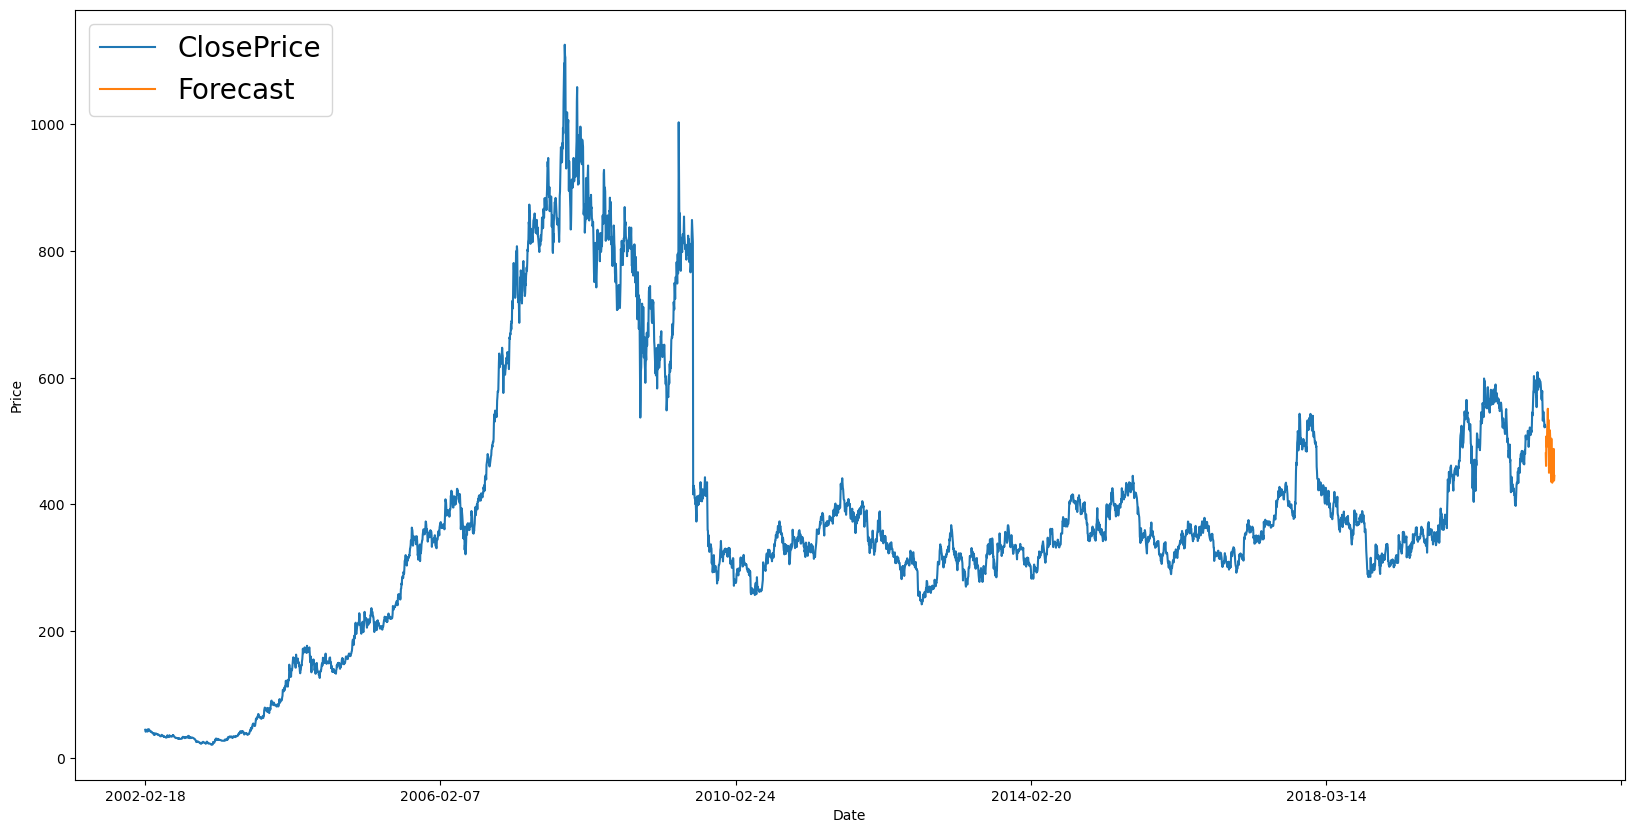

In [62]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')